# Introduction

=================================================

Milestone Project 1

Nama  : Juan Nembaopit

Batch : RMT-040

Source Database URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Tableu Url: https://public.tableau.com/views/Juan_Nembaopit_Supermarket_Sales_Milestone1/SupermarketSales?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


The objective of this milestone is to do analysis on a dataset, make a problem statement, and then solve the problem by doing analyis based on the dataset. The student first choose a data set that will be used as a dataset. Next is to came up with a problem statement based on SMART. A little data exploration and data cleaning is then done to make analysis easier. The analysis are done visually by tableu and some through calculations through descrptive and inferensial analysis. After analyzing the data, the student need to came up with a solution or recommendation that answer the problem statement. 


=================================================

# Problem Identification

### **Topic: Analysis of factors that influence the total supermarket sales**



### **SMART**

**Specific**: Increase total supermarket sales by analyzing the factors that influed them.

**Measurable**: Increase total supermarket sales by 5% within 6 months.

**Achievable**: By analyzing historical sales data from 3 supermarket branches over 3 months, we can identify key factors affecting total sales and formulate strategies for improvement.

**Relevant**: increased sales are crucial for the supermarket's profit growth in a competitive market, especially in cities with a high populations and intense competition.

**Time-bound**: The sales will be measured and evaluated within 6-month period.





### **Problem Statement** 
Increase total supermarket sales by 5% within 6 months through the analytics of historical sales data from 3 branches to identify key factors influencing sales, thereby formulating effective stategies to improve profitability in a competitive market.


### **Background**
 With the rise of supermarkets in major cities and the resulting competitive lanscape, analyzing sales data is crucial. This dataset, comprising three months of sales records from three branches of supermarket company, is well suited applying predictive data analytics methods.

### **Problem Breakdown** 

*   What is the relationship between customer type and total spending? (Visual)
*   What product categories contribute the most to total sales in each branch? (visual)
*   How is the total sales distributed among the 3 supermarket branches?(visual)
*   How does the total sales trend over time for each branch? (visual)
*   what is the average transaction amount and how varied are individual transaction from that average across all branches? (analysis)
*   what is the difference between the average total sales of popular product line and other product line? (analysis)



# Data Loading

Dataset source: Kaggle


Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

### Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


### Read DataSet 

In [3]:
# Reading dataset
df = pd.read_csv("supermarket_sales.csv")

#Output dataset
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


insight:In this Table shows sales history of a supermarket company from three of its branches for three months period. This data will help us to do descriptive and inferential analysis. Also help us to came up with solution to generate more sales. 

### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# checking duplicated rows 

df.duplicated().sum()

np.int64(0)

In [6]:
# checking missing value

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# Loading specific column that are needed to do analysis 
focused_data = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment', 'Rating']

# make a new dataframe only for selected column
df_new = df[focused_data].copy()


In [8]:
# new selected data Table
df_new.head(12)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,627.6165,3/25/2019,18:30,Ewallet,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,433.6920,2/25/2019,14:36,Ewallet,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,772.3800,2/24/2019,11:38,Ewallet,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,76.1460,1/10/2019,17:15,Credit card,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,172.7460,2/20/2019,13:27,Credit card,5.9


**Data exploration result and what to do**:

1. *We will only take columns that have the data that we need to do analysis*

to do: make a new data frame that only have columns that we need which are invoice id, branch,city, customer type, gender,product line, unit price, quantity, total, date, time, payment, rating.

2. *The data type of date seems to be a string, it should be in date time data type*

to do: using pandas to_datetime function we will change the data type to the right one


3. *remove white space for the names of the columns so it is easier to process the data and do analysis.*

to do: renaming all the columns that we need to analyze. 

4. *There is no duplicated or missing values in the data so there is no need to replace missing values.*

# Data Cleaning

### Removing white spaces for all column titles

In [8]:
# removing white spaces for all column titles
df_new.rename(columns={'Invoice ID': 'Invoice_ID', 'Customer type': 'Customer_Type', 'Product line': 'Product_Line', 'Unit price': 'Unit_Price'}, inplace=True)

In [9]:
#check outout 
df_new.head(3)


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,7.4


### Convert Date datatype to datetime

In [10]:
# convert datatype
df_new['Date'] = pd.to_datetime(df_new['Date'])

In [11]:
#check date data type
df_new['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

### Cleaned Dataset

In [12]:
df_new.head()

,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,5.3


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer_Type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product_Line   1000 non-null   object        
 6   Unit_Price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   object        
 11  Payment        1000 non-null   object        
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 101.7+ KB


In [14]:
# save cleaned dataset to csv file
df_new.to_csv('Cleaned_Supermarket_sale.csv', index = False)

# Analysis and Calculations

**Tableau Visual Url:** https://public.tableau.com/views/Juan_Nembaopit_Supermarket_Sales_Milestone1/SupermarketSales?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

### Relationship between Customer Type and Their Total Spending

In this first analysis we will analyze the relationship between *Customer type* and *Total spending*. We'll take a look at our customers spending behaviour based on their category and see if there is a difference between them to gain insight on how we could increase the sales of our supermarket.


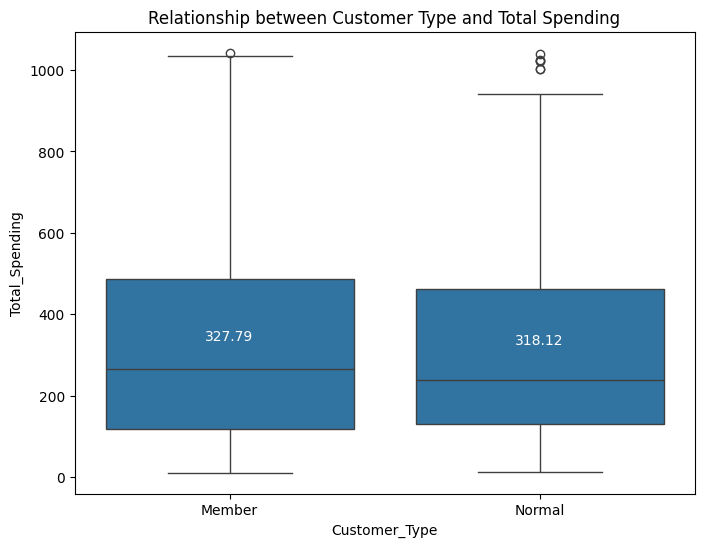

In [15]:
# Visualization analysis
plt.figure(figsize=(8,6))   #figure size
ax = sns.boxplot(x='Customer_Type', y='Total', data=df_new)  #setting x and y axis
plt.title('Relationship between Customer Type and Total Spending')  # Chart Title
plt.xlabel('Customer_Type') # label for x-axis
plt.ylabel('Total_Spending')    # label for y-axis 

# showing the mean value
means = df_new.groupby('Customer_Type')['Total'].mean() # Calculate the mean value of total spending
for i, mean in enumerate(means):    
    ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', color='white')    # format for the result mean

# plot output
plt.show()

**Insight**: There are two type of customer in this dataset. They are member and Normal customer. From the box plot above we can see that members tend spend slightly more compared to a normal customer. This means, to increase the sales based on this insight, we need to focus on improving the conversion rate of normal customers into member in order to increase our overall profitability and our business performance on the sales. 

### Total Overall Sales Distribution Among Branches 

The second analysis we will look more on how the overall sales volumes distributed among the three supermarket branches

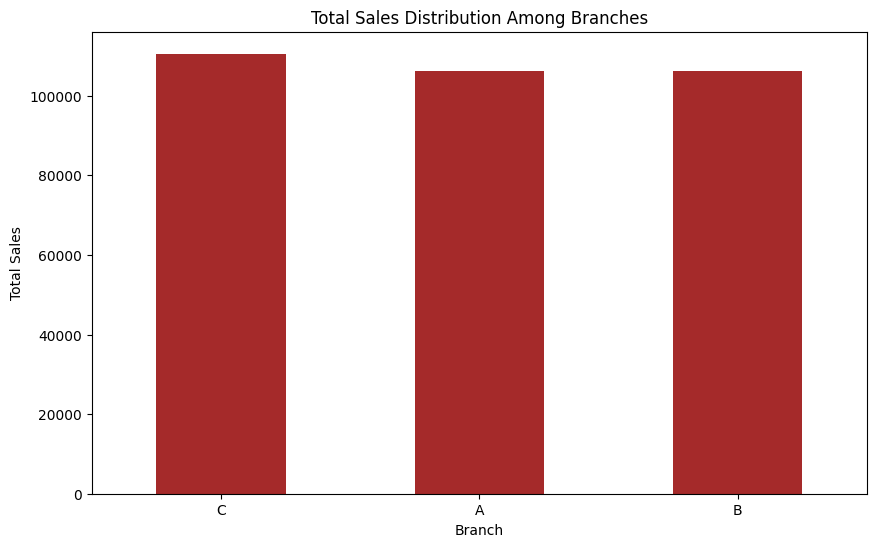

In [9]:
# Generate barchart
sales_by_branch = df_new.groupby('Branch')['Total'].sum().sort_values(ascending=False)  # group by total sales of each branches
plt.figure(figsize=(10,6))  # size of figure
sales_by_branch.plot(kind='bar',color='brown')  # generate bar chart with brown color
plt.title('Total Sales Distribution Among Branches') # title of the chart
plt.xlabel('Branch')    #x-axis label
plt.ylabel('Total Sales')   # y-axis label
plt.xticks(rotation=0)  # set x axis horizontal
plt.show()  # show output

**Insight**: The bar chart above shows the overall sales performance of each branch which tells us which branch has the highest total sales volume. by visually analyzing through the chart, we can see that branch A has the highest total overall sales, followed by branch B, and on the last one is C. This means that we should investigate on why can branch A out perform branch B and C. On the next analysis, we'll look through the sales interms of the categories that are popular in each branches. We can focus on branch A and see what product is popular in that store so we could perform as good as branch A.

### How Product Category Affect Total Sales 

The Third analysis we'll be looking what product categories contribute the most to the total sales in each branch. This analysis will help us to find the most popular product from each branch and help us choose which product to stock up to or which product attract customer the most.

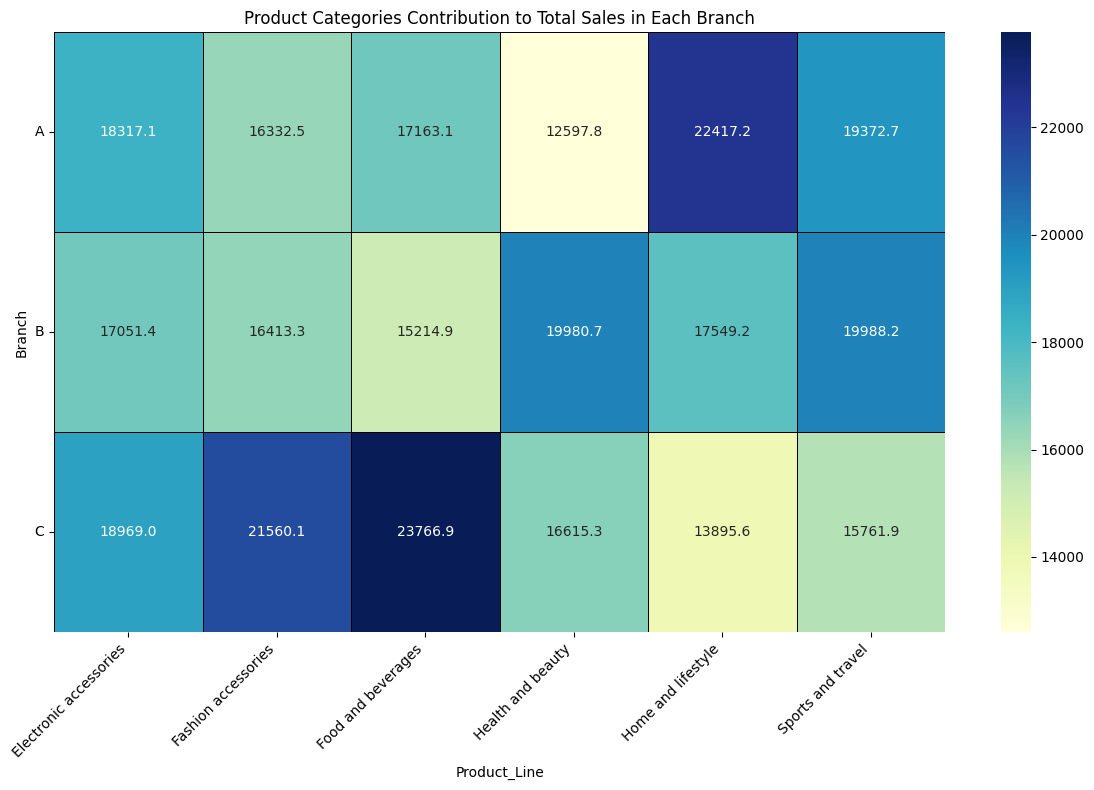

In [17]:
# make Heat Map chart for comparison

# Group by Branch and Product Line, summing the 'Total' sales
product_sales_by_branch = df_new.groupby(['Branch', 'Product_Line'])['Total'].sum().unstack()

# Create the Heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(product_sales_by_branch, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, linecolor='black')    # generate heat map
plt.title('Product Categories Contribution to Total Sales in Each Branch')    # chart Title
plt.xlabel('Product_Line')  # x-axis label
plt.ylabel('Branch')    # y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal

# Chart Output
plt.tight_layout()
plt.show()


**Insight**: This heat map chart shows how each product line affect sales performance of each supermarket branch. From the visualization above we can see that there is no product category that dominates in all branches. Each branches have developed experties or a good reputation for a certain product line. In branch A, Home and lifestyle contributes most of their total sales. In branch B, Health and beauty and sport and lifestyle are the two most popular product line. In branch C, Food and baverages contributes the highest sales and is the most popular product line in branch C. 

To increase the sales, we sould focus on each supermarket branch specialty. This could mean ensuring adequate inventory for product line that is popular in each branches; running targeted promotions on these product line; and providing more staff or specialized training for each specific product line that are popular in each branch.

#### Contribution of Each Category Side-by-Side Chart

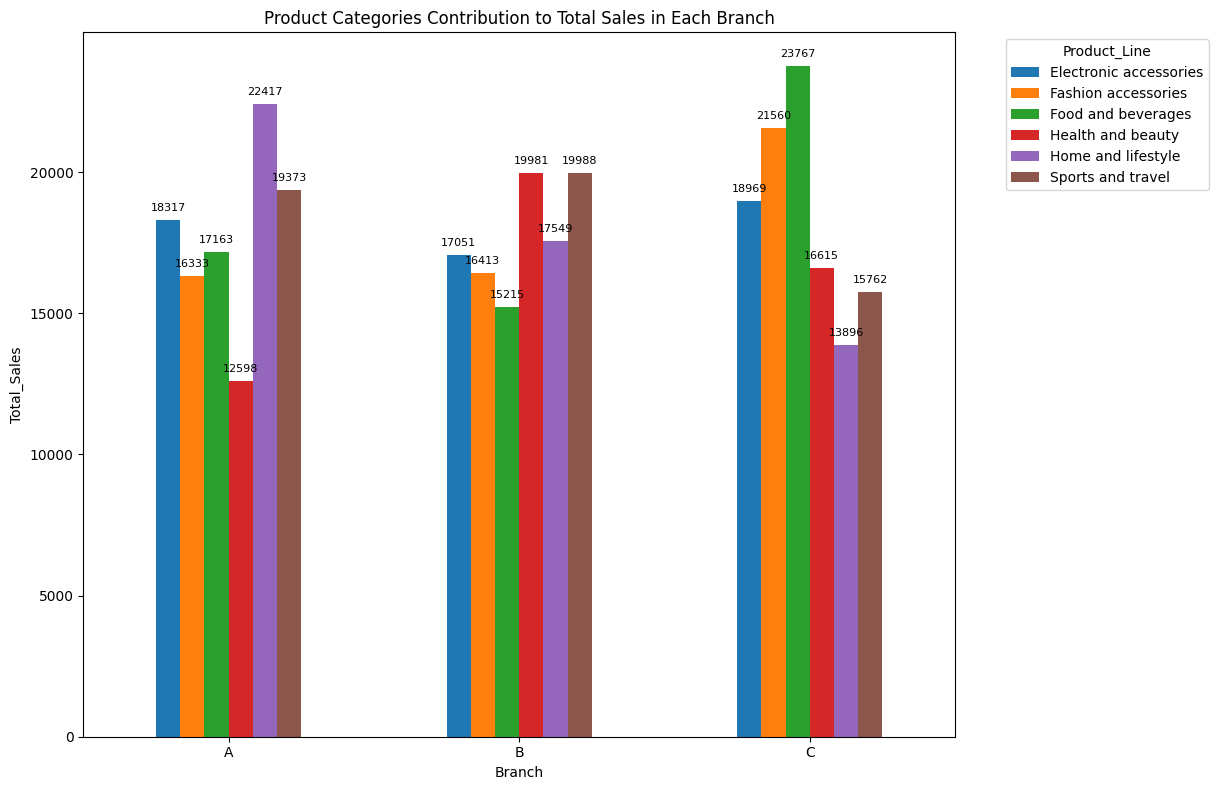

In [18]:
# making side-by-side bar chart 
ax = product_sales_by_branch.plot(kind='bar', figsize=(12, 8)) #generate barchart
plt.title('Product Categories Contribution to Total Sales in Each Branch')  #title for the chart
plt.xlabel('Branch')    # label for x-axis
plt.ylabel('Total_Sales')       # label for y-axis
plt.xticks(rotation=0)  # make x-axis horizontal
plt.legend(title='Product_Line', bbox_to_anchor=(1.05, 1), loc='upper left') # generate legend for product line category

# Add text labels on top of each bar
for p in ax.patches:    # iterate throgh each bar
     # Format the number, X and Y coordinate, Alignment, and font format
    ax.annotate(f'{p.get_height():.0f}',(p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),textcoords='offset points')

plt.tight_layout()  # adjust subplot parameter spacing between elements
plt.subplots_adjust(right=0.8) # make space for legend
plt.show() # show chart outout

**insight**: By visually inspecting the chart above, we notice that segments color blue and brown are consistently among the top largest segments of each branch. Blue represents electronics accessories and brown represents sports and travel. This means these two categories are popular among customers and we should ensure that we have sufficient stok of these categogies items at our branch becasue these products attract customers. More customers means an increase in sales.

On the previous analysis we said that we would investigate more on what category is popular and generates the most sales on branch A. From the plot we could see that category Home and lifestyle generates the most sales in branch A. This means we should stock up for this category and improve our marketing towards home and lifestyle as well.

### On the fourth analysis we'll investigate on how does the total sales trend over time for each branch

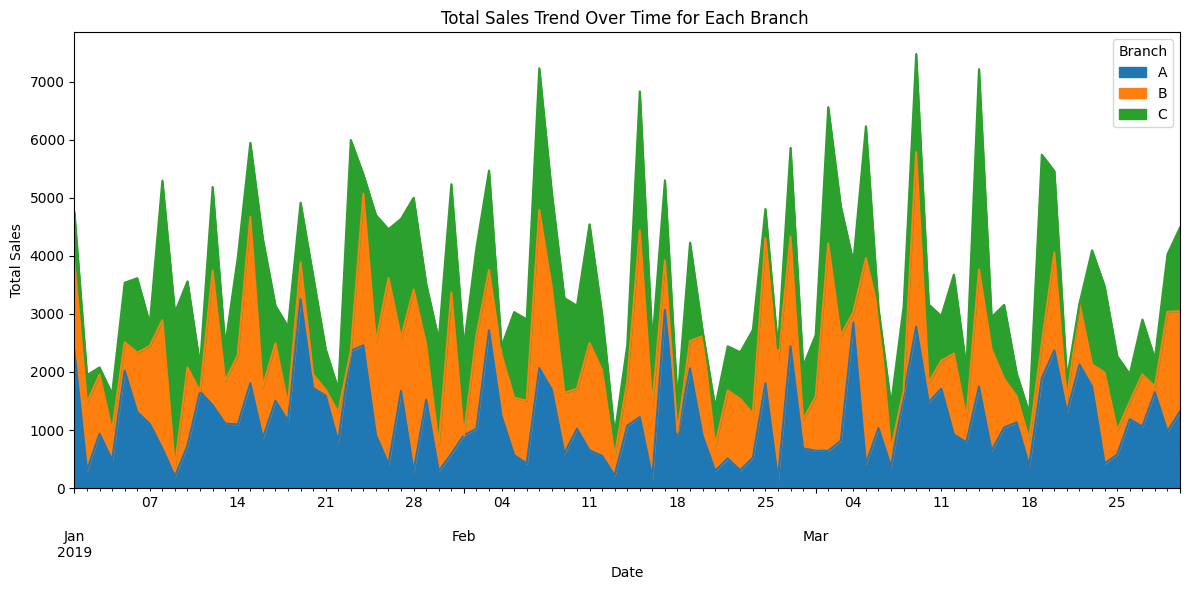

In [19]:
# Group by Date and Branch, summing the 'Total' sales, and then unstack
sales_trend_by_branch = df_new.groupby(['Date', 'Branch'])['Total'].sum().unstack()

# Plot the stacked area chart
sales_trend_by_branch.plot(kind='area', stacked=True, figsize=(12, 6))

# Labels on Chart
plt.title('Total Sales Trend Over Time for Each Branch ')   #Title of chart
plt.xlabel('Date')  # x-axis label
plt.ylabel('Total Sales')   # y-axis label

#Chart Output
plt.tight_layout()
plt.show()

**Insight**: This line chart shows the sales over time of each branches. It seems that sales trends varies by branch over time. From this chart we can strategize on what to do to make business plans on how the supermarket will work. For example, During holidays or peak seasons where salles peaked, we need to ensure to stoked popular items that usually in high demand and probably increase saff work schedule to handle costumers traffic line during high season. When its low season, we'll do the opposite. By knowing this timing, we can maximize our sales reduce unecessary cost. 

#### Chart below are a better view to see each branch sales over time trend line

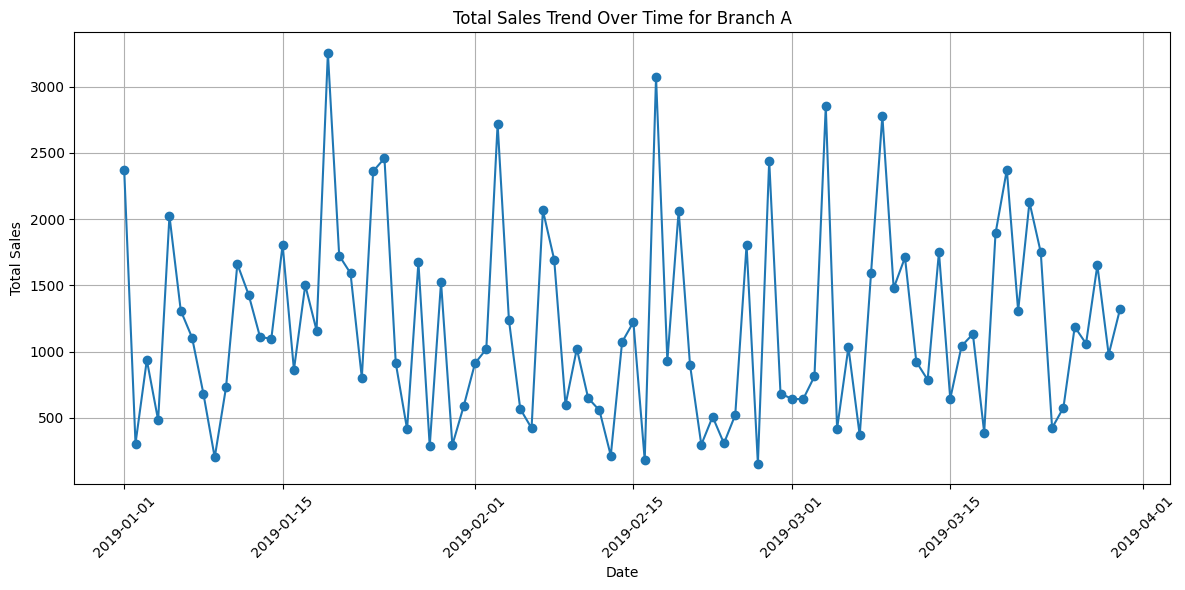

In [20]:
# Plot the sales trend for Branch A

# Group by Date and Branch, summing the 'Total' sales
sales_trend_by_branch = df_new.groupby(['Date', 'Branch'])['Total'].sum().reset_index() #rcalculate the sum of total sales based on date and branch group together, reste the index

# Filter data for Branch A
branch_A_data = sales_trend_by_branch[sales_trend_by_branch['Branch'] == 'A']

# Plot the sales trend for Branch A
plt.figure(figsize=(12, 6))  # Create a new figure
plt.plot(branch_A_data['Date'], branch_A_data['Total'], marker='o', linestyle='-')  # generate line chart trend line
plt.title('Total Sales Trend Over Time for Branch A')   # chart Title
plt.xlabel('Date')  # x-axis label
plt.ylabel('Total Sales')   # y-axis label
plt.xticks(rotation=45) # rotation of x-axis label
plt.grid(True)  # add grid

# show chart output
plt.tight_layout()
plt.show()

**Insight**: From  this trend line of total sales through time for branch A we can see that the total sales is inconsistent through out times. The trend line fluctuates, it means its not a steady growth. From The chart we can see that branch A's Total sales reach it's peak in January and reaches its lowest sales by the end of february. Through this we can do more analyis on factors that affects total sales on each month and find solutions to have a steady growth.

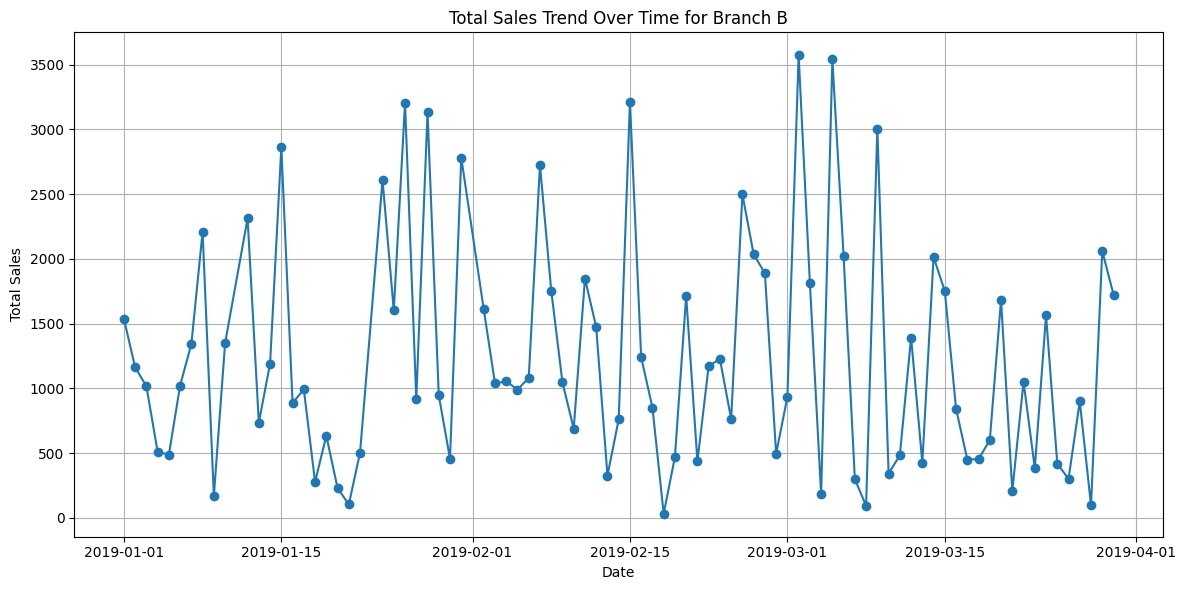

In [21]:
# Plot the sales trend for Branch B

branch_B_data = sales_trend_by_branch[sales_trend_by_branch['Branch'] == 'B'] # filter all branch B data
plt.figure(figsize=(12, 6))  # Create a new figure
plt.plot(branch_B_data['Date'], branch_B_data['Total'], marker='o', linestyle='-') # generate line chart
plt.title('Total Sales Trend Over Time for Branch B') # title of chart
plt.xlabel('Date') # x-axis label
plt.ylabel('Total Sales') # y-axis label
plt.xticks(rotation=0) # x-axis label rotation
plt.grid(True) # add grid
plt.tight_layout()
plt.show() 

**Insight**: From this trend line we can see that the total sales of branch B through time also fluctuates and doesn't have a steady growth. Branch B have a good performance in march, their total sales highest peak happens on this month; however, their performance decrease by the end of the month. 

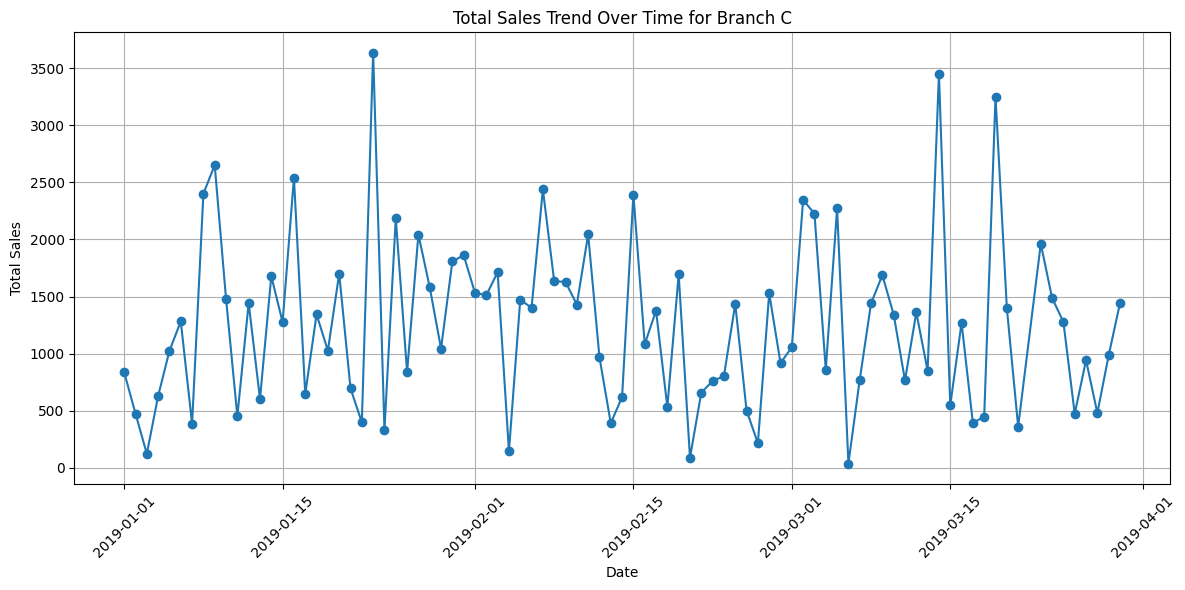

In [22]:
# Plot the sales trend for Branch C

branch_C_data = sales_trend_by_branch[sales_trend_by_branch['Branch'] == 'C'] # filter all branch C data
plt.figure(figsize=(12, 6))  # Create a new figure
plt.plot(branch_C_data['Date'], branch_C_data['Total'], marker='o', linestyle='-') # generate line chart
plt.title('Total Sales Trend Over Time for Branch C') # title of chart
plt.xlabel('Date') # x-axis label
plt.ylabel('Total Sales') # y-axis label
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()  # output plot

**Insight**:  Branch C Total sales also fluctuates through time and inconsistent. Their best total sales happens on january, where it reaches its peak. In february it doesn't really have a good sales, but branch C make a better performance on the following month eventhough it is not as high as their highest peak sales in January. 


as we can see from each branches trend line, we can conclude that each branch have inconsistent total sales for the past three months. This means we should Investigate more on what is the caused of this inconsistency and came up with a solution to make a steady growth on total sales. 

### Central Tendencies of Transaction Amounts

Next, After we analyze the data visually, we'll now calculate the statistics values of this data. In this analysis we want to understand the typical transaction amount and the spread of transaction amounts in our supermarket sales data.

In [23]:
# Statistic Descriptive Analysis

#Calclate Central Tendency 
mean_total = df['Total'].mean() #calculate mean of total sales
median_total = df['Total'].median() # calculate median of total sales

# measures Variance 
std_total = df['Total'].std() # Calculate standard deviation
Q_75, Q_25 = df['Total'].quantile([0.75,0.25]) # calculate quartiles
iqr_total = Q_75 - Q_25     # calculate iqr range

# result output
print("Descriptive Statistics")
print("Mean: ",mean_total)
print("Median: ",median_total)
print("Standard Deviation: ",std_total)
print("IQR: ",iqr_total)

Descriptive Statistics
Mean:  322.966749
Median:  253.848
Standard Deviation:  245.88533510097187
IQR:  346.927875


**Insight** : From the calculation of central tendency, we can see that the average total sales of the overall supermarket is significantly higher than its median value. This means the data is right skewed or have a positive skew which is caused by some large transaction that pulls the average up. 

from the measures of variance we can see that the standard deviation is high which means the data varies and from the range we can see that IQR is less sensitive to outliers than the std.

### Difference between the most popular productline and regular product line

Lastly, the analysis that we'll do is to see if there is a difference between regular and popular productline. Is the average total sales for the most popular productline significantly higher than the average total sales for all other productline. In this data, the most popular product line, in terms of total sales, is Food and Baverages. We will compare this product line with the rest of the product line which are Electronics accessories, fashion accessories, health and beauty, home and lifestyle, and sport and travel. We want to see if we should focus on the most popular product line or not, in order to increase total sales of each branch. 

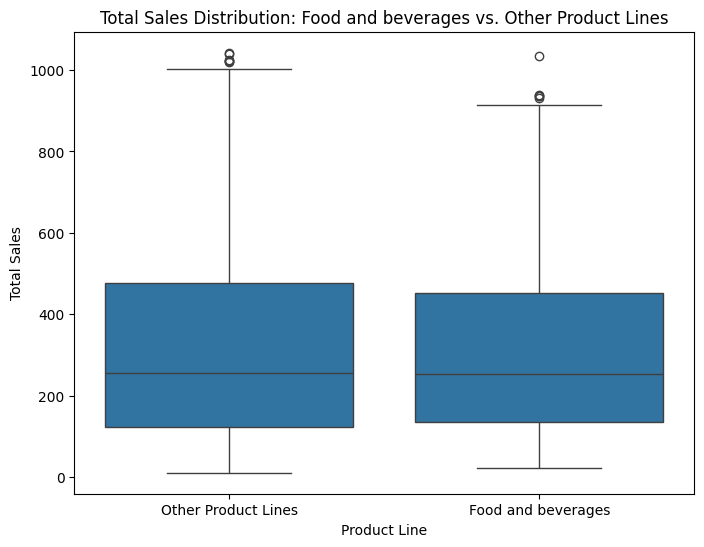

In [26]:
# Identify Top Selling Product Line 
product_sales = df_new.groupby('Product_Line')['Total'].sum().sort_values(ascending=False) # 
most_popular_product = product_sales.index[0]   # get the most popular prodct line

# Create a new column to indicate whether a transaction is from the most popular product line
df_new['Is_Popular'] = df_new['Product_Line'] == most_popular_product

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Popular', y='Total', data=df_new)
plt.title(f'Total Sales Distribution: {most_popular_product} vs. Other Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks([0, 1], ['Other Product Lines', most_popular_product]) # Rename x-axis labels for clarity
plt.show()

**Insight**: The boxplot reveal that the median sales amount for most popular product line is similar to the other product lines. This means that customers spend about the same on average.

#### Hypothesis testing

In [27]:
# H0 : The difference in average sales between the most popular product line and other product line is statistically significant.
# H1: There is no statistically significant difference in average sales between the most popular product line and other product line

#significance level
alpha = 0.05

# Identify Top Selling Product Line 
product_sales = df_new.groupby('Product_Line')['Total'].sum().sort_values(ascending=False) # 
most_popular_product = product_sales.index[0]   # get the most popular prodct line

# grouped product that is popular and regular product
most_popular_sales = df_new[df_new['Product_Line'] == most_popular_product]['Total']    # group most popular product total sales
other_sales = df_new[df_new['Product_Line'] != most_popular_product]['Total']   # group regular product price

# Perform Independent Two Sample T-test
t_statistic, p_value = stats.ttest_ind(most_popular_sales, other_sales, equal_var=False) 

print("Independent Two-Sample T-Test:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

Independent Two-Sample T-Test:
T-statistic: -0.02
P-value: 0.986


In [28]:
# showing the most popular product line
most_popular_product

'Food and beverages'

**Insight**: Based on the two-sample t-test comparing average sales of the top product line and to all other, we can conclude that there is no statistically significant difference in average sales between the most popular product line and other product lines.

The results of the t-test is -0.02 and the p value is 0.986. The significance level is 0.05 (alpha). Since p-value is more than alpha, we fail to reject the null hypothesis, suggesting that there isn't sufficient evidence to conclude a significant difference in average total sales. This means that we do not need to focus on the most popular product line because it doesn't really affect the total sales if we do focus on Food and Baverages. 

# Conclusion

From the data above, to achieve the desired 5% sales increase within six months, the supermarket must do a couple of this. First is to implement targeted customer loyalty program to increase loayal member on the supermarket. Optimize inventory, promotions, and staff quality on each branch specific product specialty. Most importantly, a regular monitoring of sales performance, customer feedback, and market trends at each branch is crucial to ensure an increase in sales. These are suggestion that can be implemented to achieve our objective.